# Information Retrieval

In [1]:
import ParserCACM
import TextRepresenter
import indexation
import modeles
from query import QueryParserCACM
import evaluation
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import operator

%load_ext autoreload # Auto reload the imported modules when running cells
%autoreload 2

""" Some info to remember when testing:
- Query 10 is about parallel computation
- Doc 46 is about parallelism too
"""

# Constants:
srcFolder = "cacm" 
srcFile = "cacm.txt"
qryFile = "cacm.qry"
relFile = "cacm.rel"
gendata = "gendata" #output folder
indexName = "cacm"
docId = 46
queryId = np.random.randint(1,60)
wordTest = "logic"

cacm_txt = os.path.join(srcFolder, srcFile)
cacm_qry = os.path.join(srcFolder, qryFile)
cacm_rel = os.path.join(srcFolder, relFile)

## Testing the indexation:

In [2]:
# Construct the index:
idx = indexation.Index(indexName, gendata)
stemmer = TextRepresenter.PorterStemmer()
%time idx.indexation(cacm_txt, ParserCACM.ParserCACM(), stemmer)

Performing the indexation...
1st pass: build the index...
2nd pass: build the inverted index...
Finished.
CPU times: user 4.35 s, sys: 596 ms, total: 4.94 s
Wall time: 5.96 s


In [3]:
print("\n###### Testing the index: ###### ")
print("Retrieve common stems in doc %d:" % docId)
stems = sorted(idx.getTfsForDoc(docId).items(), key=operator.itemgetter(1), reverse=True)
print([stem for stem, freq in stems[:10]])
print("""Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”""")

print("\nRetrieve docs that contains 'logic'")
docs = idx.getTfsForStem("logic") 
print("Should include doc 63 and 46:", (63 in docs.keys() and 46 in docs.keys()))


###### Testing the index: ###### 
Retrieve common stems in doc 46:
['program', 'problem', 'programm', 'logic', 'stretch', 'requir', 'parallel', 'independ', 'system', 'number']
Should look like
> “The tendency towards increased parallelism in
> computers is noted.  Exploitation of this parallelism
> presents a number of new problems in machine design
> and in programming systems...”

Retrieve docs that contains 'logic'
Should include doc 63 and 46: True


In [4]:
# Choosing what to test:
test_binaryweighter = True
test_tfidfweighter = True
test_queryparser = True
test_PRrecallmeasure = True
test_averageprecision = True
test_eval_ir_model = True
test_unigram_model = True

## Testing the weighters:

In [22]:
query = stemmer.getTextRepresentation(" Parallel languages; languages for parallel computation")

if test_binaryweighter:
    print("\n#####Testing BinaryWeighter: #####")

    bw = modeles.BinaryWeighter(idx)
    print("bw.getDocWeightsForDoc(",docId,"):", 
        bw.getDocWeightsForDoc(docId))
    print("\nbw.getDocWeightsForStem('"+wordTest+"'):", 
        bw.getDocWeightsForStem(wordTest))
    print("\nbw.getWeightsForQuery(' Parallel languages; languages for parallel computation'):", 
        bw.getWeightsForQuery(query))

    print("\n#####Testing Vectoriel with BinaryWeighter: #####")
    vect = modeles.Vectoriel(idx, bw)
    print("Top 10 documents for the previous query:")
    print("""Should include some of the following docs: 1043, 1188, 1306, 
    1358, 1396, 1491, 1923, 2246, 2316, 2527, 2699, 2710, 2715, 2716, 
    2906, 2923, 2956, 3073, 3150, """)
    print(vect.getRanking(query)[:10])
else:
    print("\n##### Skipping the test of BinaryWeighter #####")
    


#####Testing BinaryWeighter: #####
bw.getDocWeightsForDoc( 46 ): {'independ': 1, 'system': 1, 'number': 1, 'scalzi': 1, 'burden': 1, 'discuss': 1, 'problem': 3, 'execut': 1, 'tendenc': 1, 'exploit': 1, 'minimum': 1, 'logic': 2, 'comput': 1, 'lowri': 1, 'met': 1, 'success': 1, 'combin': 1, 'techniqu': 1, 'note': 1, 'mcdonough': 1, 'multiprogramm': 1, 'increas': 1, 'stretch': 2, 'requir': 2, 'design': 1, 'supervisori': 1, 'codd': 1, 'balanc': 1, 'describ': 1, 'built': 1, 'feasibl': 1, 'present': 1, 'carefulli': 1, 'program': 4, 'place': 1, 'machin': 1, 'compil': 1, 'concurr': 1, 'parallel': 2, 'programm': 3, 'consider': 1}

bw.getDocWeightsForStem('logic'): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 2, 1381: 1, 2406: 3, 1383

In [6]:
tfidfWeighter = modeles.TfidfWeighter(idx)
vect = modeles.Vectoriel(idx, tfidfWeighter)

if test_tfidfweighter:
    print("\n###### Testing TfidfWeighter: ###### ")
    print("tfidfWeighter.getDocWeightsForDoc(", docId, "):",
         tfidfWeighter.getDocWeightsForDoc(docId))
    print("\ntfidfWeighter.getDocWeightsForStem(\"logic\"):",
         tfidfWeighter.getDocWeightsForStem(wordTest))
    print("\ntfidfWeighter.getWeightsForQuery(query):",
         tfidfWeighter.getWeightsForQuery(query))
    print("\n###### Testing Vectoriel with TfidfWeighter: ###### ")
    print("Top 10 documents for the query:")
    print(vect.getRanking(query)[:10])
else:
    print("\n##### Skipping the test of TfidfWeighter #####")


###### Testing TfidfWeighter: ###### 
tfidfWeighter.getDocWeightsForDoc( 46 ): {'independ': 1, 'system': 1, 'number': 1, 'scalzi': 1, 'burden': 1, 'discuss': 1, 'problem': 3, 'execut': 1, 'tendenc': 1, 'exploit': 1, 'minimum': 1, 'logic': 2, 'comput': 1, 'lowri': 1, 'met': 1, 'success': 1, 'combin': 1, 'techniqu': 1, 'note': 1, 'mcdonough': 1, 'multiprogramm': 1, 'increas': 1, 'stretch': 2, 'requir': 2, 'design': 1, 'supervisori': 1, 'codd': 1, 'balanc': 1, 'describ': 1, 'built': 1, 'feasibl': 1, 'present': 1, 'carefulli': 1, 'program': 4, 'place': 1, 'machin': 1, 'compil': 1, 'concurr': 1, 'parallel': 2, 'programm': 3, 'consider': 1}

tfidfWeighter.getDocWeightsForStem("logic"): {2817: 1, 3154: 6, 1030: 1, 2568: 1, 2313: 2, 3082: 1, 2060: 1, 2322: 1, 2067: 1, 22: 1, 2845: 1, 30: 1, 2848: 3, 2851: 1, 2054: 1, 3111: 1, 1834: 1, 1324: 1, 46: 2, 1327: 1, 2952: 1, 2871: 4, 3133: 5, 63: 2, 320: 8, 1602: 2, 2230: 1, 2888: 1, 3147: 1, 1101: 1, 2127: 2, 850: 1, 595: 2, 753: 1, 2145: 1, 2146: 

## Testing the QueryParser

In [7]:
if test_queryparser:
    print("\n###### Testing QueryParserCACM: ###### ")
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #%d:" % queryId)
    while query is not None and query.getID() != str(queryId):
        #print(query)
        #print(20*'-')
        query = qp.nextQuery()

    print("Query:", query)
    queryTxt = stemmer.getTextRepresentation(query.getText())
    print("\nCompute scores:")
    scores = vect.getRanking(queryTxt)
    print(scores[:10])
    print("Done.")
else:
    print("\n##### Skipping the test of QueryParserCACM #####")


###### Testing QueryParserCACM: ###### 
Searching for query #42:
Query: Query {id=42, txt='Computer performance evaluation techniques using pattern recognition
and clustering.
', relevances=[1069, 1518, 1572, 1653, 1805, 1827, 1884, 2022, 2085, 2151, 2247, 2318, 2344, 2522, 2542, 2749, 2951, 2984, 3048, 3072]}

Compute scores:
[('2641', 0.40936316959576724), ('204', 0.39313358980794361), ('2494', 0.37363326333172714), ('462', 0.35447425092083429), ('2231', 0.34979238253191614), ('1653', 0.33104046921205771), ('2545', 0.3112134218886618), ('2402', 0.31057123931147884), ('2019', 0.28384045480120457), ('2942', 0.27690417154897301)]
Done.


## Testing measures:



###### Testing evaluation.PrecisionRecallMeasure: ###### 
Searching for query # [10 32 15  9  3 15 44 22  6 30]
Query: Query {id=3, txt='Intermediate languages used in construction of multi-targeted compilers; TCOLL
', relevances=[1134, 1613, 1807, 1947, 2290, 2923]}
Retrieve scores...
CPU times: user 228 ms, sys: 64 ms, total: 292 ms
Wall time: 348 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 6 relevant results
   i |found| precision | recall
   10|   1 | 0.100000  |0.166667
  136|   2 | 0.014706  |0.333333
  137|   3 | 0.021898  |0.500000
  261|   4 | 0.015326  |0.666667
  319|   5 | 0.015674  |0.833333
  368|   6 | 0.016304  |1.000000


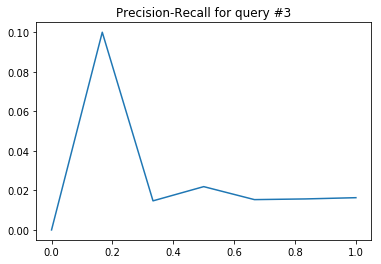

--------------------
Query: Query {id=6, txt='Interested in articles on robotics, motion planning particularly the
geometric and combinatorial aspects.  We are not interested in the
dynamics of arm motion.
', relevances=[1543, 2078, 2828]}
Retrieve scores...
CPU times: user 288 ms, sys: 136 ms, total: 424 ms
Wall time: 377 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 3 relevant results
   i |found| precision | recall
   16|   1 | 0.062500  |0.333333
   17|   2 | 0.117647  |0.666667
   62|   3 | 0.048387  |1.000000


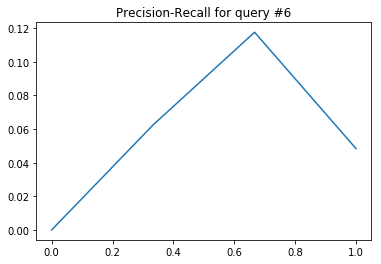

--------------------
Query: Query {id=9, txt='Security considerations in local networks, network operating systems,
and distributed systems.
', relevances=[2372, 2632, 2870, 2876, 3068, 3111, 3128, 3158, 3177]}
Retrieve scores...
CPU times: user 284 ms, sys: 164 ms, total: 448 ms
Wall time: 375 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 9 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.111111
    3|   2 | 0.666667  |0.222222
   11|   3 | 0.272727  |0.333333
   17|   4 | 0.235294  |0.444444
   18|   5 | 0.277778  |0.555556
   38|   6 | 0.157895  |0.666667
  125|   7 | 0.056000  |0.777778
  129|   8 | 0.062016  |0.888889
  349|   9 | 0.025788  |1.000000


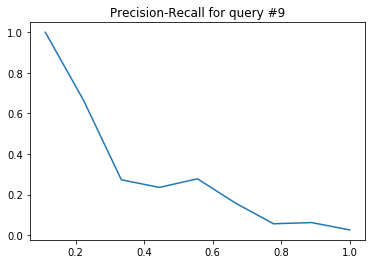

--------------------
Query: Query {id=10, txt='Parallel languages; languages for parallel computation
', relevances=[46, 141, 392, 950, 1158, 1198, 1262, 1380, 1471, 1601, 1613, 1747, 1795, 1811, 2060, 2150, 2256, 2289, 2342, 2376, 2433, 2618, 2664, 2685, 2700, 2714, 2777, 2785, 2851, 2895, 2896, 2912, 3039, 3075, 3156]}
Retrieve scores...
CPU times: user 276 ms, sys: 156 ms, total: 432 ms
Wall time: 372 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 35 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.028571
    2|   2 | 1.000000  |0.057143
    4|   3 | 0.750000  |0.085714
    6|   4 | 0.666667  |0.114286
   12|   5 | 0.416667  |0.142857
   29|   6 | 0.206897  |0.171429
   47|   7 | 0.148936  |0.200000
   66|   8 | 0.121212  |0.228571
   92|   9 | 0.097826  |0.257143
   97|  10 | 0.103093  |0.285714
   99|  11 | 0.111111  |0.314286
  132|  12 | 0.090909  |0.342857
  135|  13 | 0.096296  |0.371429
  143|  14 | 0.097902  |0.400000
  

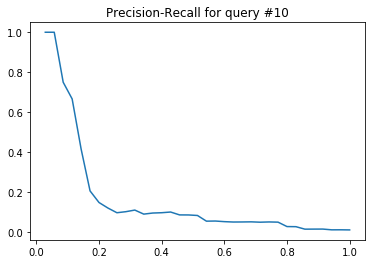

--------------------
Query: Query {id=15, txt='Find all discussions of horizontal microcode optimization with special
emphasis on optimization of loops and global optimization.
', relevances=[1231, 1551, 1613, 1947, 2263, 2495, 2598, 2685, 2701, 2880]}
Retrieve scores...
CPU times: user 288 ms, sys: 176 ms, total: 464 ms
Wall time: 428 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 10 relevant results
   i |found| precision | recall
    4|   1 | 0.250000  |0.100000
   21|   2 | 0.095238  |0.200000
   23|   3 | 0.130435  |0.300000
   47|   4 | 0.085106  |0.400000
   48|   5 | 0.104167  |0.500000
   53|   6 | 0.113208  |0.600000
  128|   7 | 0.054688  |0.700000
  310|   8 | 0.025806  |0.800000
 2252|   9 | 0.003996  |0.900000
 2659|  10 | 0.003761  |1.000000


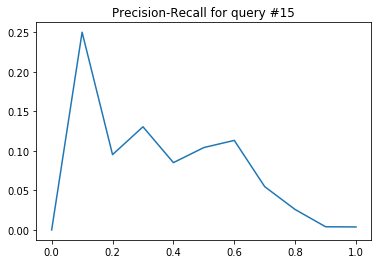

--------------------
Query: Query {id=22, txt='I am interested in hidden-line and hidden-surface algorithms for
cylinders, toroids, spheres, and cones.  This is a rather specialized
topic in computer graphics.
', relevances=[2369, 2384, 2441, 2473, 2564, 2637, 2638, 2678, 2692, 2751, 2760, 2761, 2827, 2828, 2829, 3116, 3149]}
Retrieve scores...
CPU times: user 228 ms, sys: 188 ms, total: 416 ms
Wall time: 362 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 17 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.058824
    2|   2 | 1.000000  |0.117647
    3|   3 | 1.000000  |0.176471
    5|   4 | 0.800000  |0.235294
    6|   5 | 0.833333  |0.294118
    7|   6 | 0.857143  |0.352941
    8|   7 | 0.875000  |0.411765
    9|   8 | 0.888889  |0.470588
   10|   9 | 0.900000  |0.529412
   13|  10 | 0.769231  |0.588235
   16|  11 | 0.687500  |0.647059
   25|  12 | 0.480000  |0.705882
   32|  13 | 0.406250  |0.764706
   33|  14 | 0.424242  |0.8235

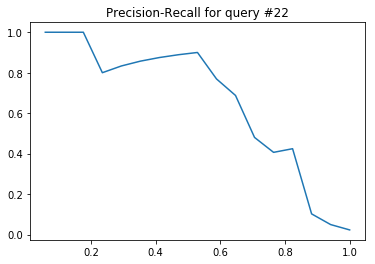

--------------------
Query: Query {id=30, txt='Articles on text formatting systems, including "what you see is what you
get" systems.  Examples: t/nroff, scribe, bravo.
', relevances=[1926, 2486, 2786, 2917]}
Retrieve scores...
CPU times: user 248 ms, sys: 168 ms, total: 416 ms
Wall time: 354 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 4 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.250000
   20|   2 | 0.100000  |0.500000
   77|   3 | 0.038961  |0.750000
   85|   4 | 0.047059  |1.000000


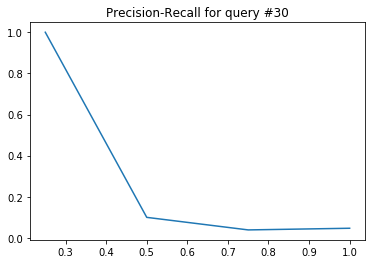

--------------------
Query: Query {id=32, txt='I'd like to find articles describing graph algorithms that are based on
the eigenvalue decomposition (or singular value decomposition) of the
ajacency matrix for the graph.  I'm especially interested in any heuristic
algorithms for graph coloring and graph isomorphism using this method.
', relevances=[366, 1145, 3139]}
Retrieve scores...
CPU times: user 264 ms, sys: 148 ms, total: 412 ms
Wall time: 360 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 3 relevant results
   i |found| precision | recall
    1|   1 | 1.000000  |0.333333
   14|   2 | 0.142857  |0.666667
  127|   3 | 0.023622  |1.000000


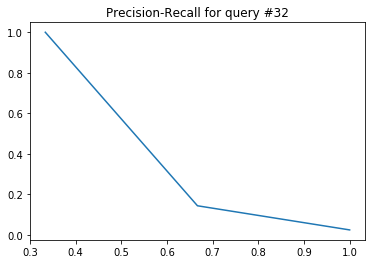

--------------------
Query: Query {id=44, txt='Texture analysis by computer.	Digitized texture analysis.  Texture
synthesis. Perception of texture.
', relevances=[1804, 1891, 2004, 2382, 2514, 2523, 2547, 2687, 2751, 2771, 2827, 2829, 2910, 2913, 2924, 3013, 3047]}
Retrieve scores...
CPU times: user 236 ms, sys: 164 ms, total: 400 ms
Wall time: 386 ms
Create PrecisionRecallMeasure object
Evaluate the scores.
This query has 17 relevant results
   i |found| precision | recall
   30|   1 | 0.033333  |0.058824
   60|   2 | 0.033333  |0.117647
  107|   3 | 0.028037  |0.176471
  209|   4 | 0.019139  |0.235294
  302|   5 | 0.016556  |0.294118
  330|   6 | 0.018182  |0.352941
  392|   7 | 0.017857  |0.411765
  512|   8 | 0.015625  |0.470588
  553|   9 | 0.016275  |0.529412
  695|  10 | 0.014388  |0.588235
  989|  11 | 0.011122  |0.647059
 1063|  12 | 0.011289  |0.705882
 1184|  13 | 0.010980  |0.764706
 1557|  14 | 0.008992  |0.823529
 1824|  15 | 0.008224  |0.882353
 1837|  16 | 0.008710  |0.

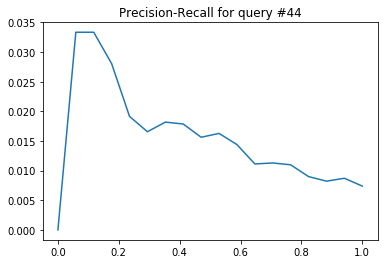

--------------------
Done.


In [29]:
if test_PRrecallmeasure:
    print("\n###### Testing evaluation.PrecisionRecallMeasure: ###### ")
    queryChosen = np.random.randint(1, 50, size=10)
    #queryChosen =[7, 10, 25]#, 14, 26, 27, 42, 43] # lots of relevant results
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #", queryChosen)
    while query is not None :
        if int(query.getID()) in queryChosen:
            print("Query:", query)
            queryTxt = stemmer.getTextRepresentation(query.getText())
            print("Retrieve scores...")
            %time ranking = vect.getRanking(queryTxt)
            print("Create PrecisionRecallMeasure object")
            irlist = evaluation.IRList(query, ranking)
            precisRecall = evaluation.PrecisionRecallMeasure(irlist)
            print("Evaluate the scores.")
            pr = precisRecall.eval(verbose=True, nbLevel=100) # (recall, precision)
            precision = [p for r,p in pr]
            recall = [r for r,p in pr]
            plt.plot(recall, precision)
            plt.title("Precision-Recall for query #"+query.getID())
            plt.show()
            print(20*'-')


        query = qp.nextQuery()
    print("Done.")
else:
    print("\n##### Skipping the test of PrecisionRecallMeasure #####")

In [30]:
if test_averageprecision:
    print("\n###### Testing evaluation.AveragePrecision: ###### ")
    queryChosen = np.random.randint(1, 50, size=10)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for query #",queryChosen, "\n")
    while query is not None :
        if int(query.getID()) in queryChosen:
            print("Query:", query)
            queryTxt = stemmer.getTextRepresentation(query.getText())
            print("Retrieve scores...")
            scores = vect.getRanking(queryTxt)
            irlist = evaluation.IRList(query, scores)
            average_measure = evaluation.AveragePrecision(irlist)
            print("Evaluate the scores.")
            average_prec = average_measure.eval(verbose=True)
            print("Average precision: %f" % average_prec)
            print(20*'-')

        query = qp.nextQuery()
    print("Done.")
else:
    print("\n##### Skipping the test of AveragePrecision #####")


###### Testing evaluation.AveragePrecision: ###### 
Searching for query # [39  2 43 49  9  5  8 44  9 14] 

Query: Query {id=2, txt='I am interested in articles written either by Prieve or Udo Pooch
', relevances=[2434, 2863, 3078]}
Retrieve scores...
Evaluate the scores.
This query has 3 relevant results
   i |found| precision
   56|   1 | 0.017857
   83|   2 | 0.024096
   94|   3 | 0.031915
Average precision: 0.024623
--------------------
Query: Query {id=5, txt='I'd like papers on design and implementation of editing interfaces,
window-managers, command interpreters, etc.  The essential issues are
human interface design, with views on improvements to user efficiency,
effectiveness and satisfaction.
', relevances=[756, 1307, 1502, 2035, 2299, 2399, 2501, 2820]}
Retrieve scores...
Evaluate the scores.
This query has 8 relevant results
   i |found| precision
    2|   1 | 0.500000
    9|   2 | 0.222222
   14|   3 | 0.214286
   53|   4 | 0.075472
  121|   5 | 0.041322
  131|   6 | 0.045

In [31]:
if test_eval_ir_model:
    print("\n###### Testing evaluation.EvalIRModel: ###### ")
    queryChosen = np.random.randint(1, 50, size=50)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
        query = qp.nextQuery()
    print("Found queries")
    irmodels = {"vectoriel": modeles.Vectoriel(idx, tfidfWeighter)}
    measures = {"averagePrecision": evaluation.AveragePrecision}
    eval_model = evaluation.EvalIRModel(queries, irmodels, measures)
    print("Calling eval()...")
    print(eval_model.eval(verbose=False))
    print("Done.")
else:
    print("\n##### Skipping the test of EvalIRModel #####")


###### Testing evaluation.EvalIRModel: ###### 
Searching for queries # [28 28 22  7  7  3 18 30 34  2  7  7 11 32 35 12 32 13 41 21  2  5 29  3 13
 44 22 11  7 14 33 34 27 49  6 34 45 39  4 48  5 19 31 24 31 23 48 35 16 18] ...
Found queries
Calling eval()...
{('vectoriel', 'averagePrecision'): (0.27754240378037742, 0.22842165414868784)}
Done.


In [32]:
if test_unigram_model:
    print("\n###### Testing LanguageModel: ###### ")
    queryChosen = np.random.randint(1, 50, size=3)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    relevants = {} #dict of {query id : list of relevant doc id}
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
            relevants[query.getID()] = list(query.getRelevants().keys())
            print(query)
        query = qp.nextQuery()
    print("Found queries")
    model = modeles.LanguageModel(idx, TextRepresenter.PorterStemmer(), 0.8)
    for q, (q_id, relev) in zip(queries, relevants.items()):
        print(q_id)
        print("Scores for 3 relevant docs:")
        for doc_id in np.random.choice(relev, size=3):
            print(doc_id, model.score(q, doc_id))
        print("Scores for 3 random docs:")
        for doc_id in np.random.choice(idx.getDocsID(), size=3):
            if doc_id in relev:
                print(doc_id, "Relevant doc")
            else:
                stems = ','.join(idx.getTfsForDoc(doc_id).keys())
                print(doc_id, stems)
                print("Irrelevant doc:", model.score(q, doc_id))
        print(20*'-')
    print("Done.")
else:
    print("\n##### Skipping the test of LanguageModel #####")


###### Testing LanguageModel: ###### 
Searching for queries # [ 2 33 36] ...
Query {id=2, txt='I am interested in articles written either by Prieve or Udo Pooch
', relevances=[2434, 2863, 3078]}
Query {id=33, txt='Articles about the sensitivity of the eigenvalue decomposition of real
matrices, in particular, zero-one matrices.  I'm especially interested in
the separation of eigenspaces corresponding to distinct eigenvalues.
Articles on the subject:
C. Davis and W.M. Kahn, "The rotation of eigenvectors by a permutation:,
SIAM J. Numerical Analysis, vol. 7, no. 1 (1970); G.W. Stewart, "Error
bounds for approximate invariant subspaces of closed linear operators",
SIAM J. Numerical Analysis., Vol. 8, no. 4 (1971).
', relevances=[2805]}
Query {id=36, txt='Fast algorithm for context-free language recognition or parsing
', relevances=[1683, 1768, 1787, 1825, 1836, 2015, 2084, 2110, 2179, 2340, 2423, 2702, 2708, 2733, 2824, 2836, 2986, 3094]}
Found queries
36
Scores for 3 relevant docs:
3094 

In [33]:
if test_unigram_model:
    print("\n###### Testing LanguageModel: ###### ")
    queryChosen = np.random.randint(1, 50, size=3)
    #queryChosen =[7, 10, 14]#, 25, 26, 27, 42, 43] # lots of relevant results
    queries = []
    relevants = {} #dict of {query id : list of relevant doc id}
    irrelevants = {} # dict of chosen irrelevant docs
    qp = QueryParserCACM(cacm_qry, cacm_rel)
    query = qp.nextQuery()
    print("Searching for queries #",queryChosen, "...")
    while query is not None :
        if int(query.getID()) in queryChosen:
            queries.append(query)
            relevants[query.getID()] = list(query.getRelevants().keys())
            irrelevants[query.getID()] = set(np.random.choice(idx.getDocsID(), size=50)) \
                                       - set(relevants[query.getID()])
            print(query)
        query = qp.nextQuery()
    print("Found queries")
    reg_values = np.linspace(0.5, 1, 5)
    for reg_val in reg_values:
        false_neg = 0
        false_pos = 0
        model = modeles.LanguageModel(idx, TextRepresenter.PorterStemmer(), reg_val)
        for q, (q_id, relev) in zip(queries, relevants.items()):
            for doc_id in relev:
                score = model.score(q, doc_id)
                if np.isneginf(score ):
                    false_neg += 1
            for doc_id in irrelevants[q_id]:
                score = model.score(q, doc_id)
                if np.isfinite(score):
                    false_pos += 1
        print("| %.3f | %2d | %2d |" % (reg_val, false_neg, false_pos))
    print("Done.")
else:
    print("\n##### Skipping the test of LanguageModel #####")


###### Testing LanguageModel: ###### 
Searching for queries # [26 37 47] ...
Query {id=26, txt='Concurrency control mechanisms in operating systems
', relevances=[1071, 1198, 1338, 1749, 1828, 1854, 1960, 2080, 2150, 2256, 2320, 2342, 2376, 2379, 2541, 2597, 2618, 2632, 2700, 2740, 2777, 2851, 2866, 2912, 2938, 3039, 3043, 3048, 3082, 3128]}
Query {id=37, txt='Articles describing the relationship between data types and concurrency
(e.g. what is the type of a process?  when is a synchronization attempt 
between two processes "type correct"?  in a message-passing system is there
any notion of the types of messages?--i.e. any way to check that the sender
of the message and the receiver are both treating the bit stream as some
particular type)
', relevances=[2265, 2377, 2558, 2625, 2632, 2651, 2738, 2840, 2939, 2941, 3144, 3148]}
Query {id=47, txt='The use of Bayesian decision models to optimize information retrieval
system performance.  This includes stopping rules to determine when a
us